<a href="https://colab.research.google.com/github/krishnaa30000/Face-Mask-detection/blob/main/Copy_of_Face_Mask_detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [ ]:
! ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
#Importing the dependencies
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
import os


In [ ]:
with_mask_files=os.listdir('/content/data/with_mask')
print(len(with_mask_files))
print(with_mask_files[0:5])

3725
['with_mask_2613.jpg', 'with_mask_1771.jpg', 'with_mask_365.jpg', 'with_mask_129.jpg', 'with_mask_3317.jpg']


In [ ]:
without_mask_files=os.listdir('/content/data/without_mask')
print(len(without_mask_files))
print(without_mask_files[0:5])

3828
['without_mask_890.jpg', 'without_mask_3355.jpg', 'without_mask_2726.jpg', 'without_mask_3175.jpg', 'without_mask_2937.jpg']


In [ ]:
# Creating labels for the two classes of images
#with mask->0
#without mask->1
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828
print(len(with_mask_labels))
print(len(without_mask_labels))


3725
3828


In [ ]:
labels=with_mask_labels+without_mask_labels
print(len(labels))

7553


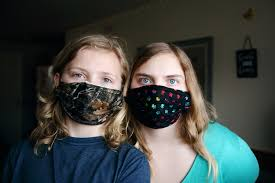

(183, 275, 3)


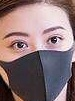

(101, 75, 3)


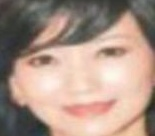

(136, 155, 3)


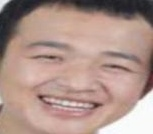

(134, 153, 3)


In [ ]:
#Displaying the images(with mask)
img1=cv2.imread('/content/data/with_mask/with_mask_2613.jpg')
cv2_imshow(img1)
print(img1.shape)
img2=cv2.imread('/content/data/with_mask/with_mask_365.jpg')
cv2_imshow(img2)
print(img2.shape)
#Displaying the images(without mask)
img3=cv2.imread('/content/data/without_mask/without_mask_3355.jpg')
cv2_imshow(img3)
print(img3.shape)
img4=cv2.imread('/content/data/without_mask/without_mask_3175.jpg')
cv2_imshow(img4)
print(img4.shape)


In [ ]:
#IMAGE PROCESSING
# [1] image resizing
# [2] convert the images to numpy array
from PIL import Image
with_mask_path='/content/data/with_mask/'
data=[]
for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)


without_mask_path='/content/data/without_mask/'
for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)








/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)



list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[ 6,  7,  9],
        [ 6,  7,  9],
        [ 7,  8, 10],
        ...,
        [41, 41, 33],
        [39, 39, 31],
        [36, 37, 29]],

       [[ 6,  7,  9],
        [ 6,  7,  9],
        [ 7,  8, 10],
        ...,
        [41, 41, 33],
        [40, 40, 32],
        [37, 38, 30]],

       [[ 6,  7,  9],
        [ 6,  7,  9],
        [ 7,  8, 10],
        ...,
        [42, 42, 34],
        [40, 41, 33],
        [38, 39, 31]],

       ...,

       [[ 3,  8, 10],
        [ 4, 15, 22],
        [ 2, 18, 27],
        ...,
        [ 1, 13,  7],
        [ 1, 11,  8],
        [ 4,  7, 12]],

       [[ 3,  7, 10],
        [ 3, 14, 21],
        [ 2, 17, 26],
        ...,
        [ 0, 12,  6],
        [ 1, 10,  8],
        [ 4,  7, 12]],

       [[ 2,  6,  9],
        [ 2, 14, 21],
        [ 1, 17, 26],
        ...,
        [ 0, 10,  6],
        [ 1,  9,  9],
        [ 4,  7, 12]]], dtype=uint8)

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
#Converting image list and data list to numpy arrays
X=np.array(data)
Y=np.array(labels)

In [ ]:
len(X)

7553

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)

(7553, 128, 128, 3)


In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=10)

In [ ]:
print(X.shape, x_train.shape, x_test.shape)

(7553, 128, 128, 3) (5287, 128, 128, 3) (2266, 128, 128, 3)


In [ ]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255


In [ ]:
#Building a Convolutional neural network(CNN)
import tensorflow as tf
from tensorflow import keras


In [ ]:
no_of_classes=2
model=keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(128,128,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(80,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')


])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(x_train_scaled, y_train, validation_split=0.4, epochs=10)

Epoch 1/10
100/100 [==============================] - 74s 741ms/step - loss: 0.0471 - accuracy: 0.9880 - val_loss: 0.3443 - val_accuracy: 0.8908
Epoch 2/10
100/100 [==============================] - 66s 659ms/step - loss: 0.0366 - accuracy: 0.9924 - val_loss: 0.3543 - val_accuracy: 0.8974
Epoch 3/10
100/100 [==============================] - 61s 612ms/step - loss: 0.0202 - accuracy: 0.9968 - val_loss: 0.3344 - val_accuracy: 0.9012
Epoch 4/10
100/100 [==============================] - 60s 603ms/step - loss: 0.0151 - accuracy: 0.9975 - val_loss: 0.3450 - val_accuracy: 0.9040
Epoch 5/10
100/100 [==============================] - 59s 596ms/step - loss: 0.0114 - accuracy: 0.9987 - val_loss: 0.3689 - val_accuracy: 0.8998
Epoch 6/10
100/100 [==============================] - 58s 585ms/step - loss: 0.0098 - accuracy: 0.9984 - val_loss: 0.3618 - val_accuracy: 0.8988
Epoch 7/10
100/100 [==============================] - 83s 836ms/step - loss: 0.0063 - accuracy: 0.9991 - val_loss: 0.3879 - val_ac

In [ ]:
#Model evaluation
model.evaluate(x_test_scaled,y_test)

71/71 [==============================] - 9s 128ms/step - loss: 0.4360 - accuracy: 0.9051


[0.4359554052352905, 0.9051191806793213]

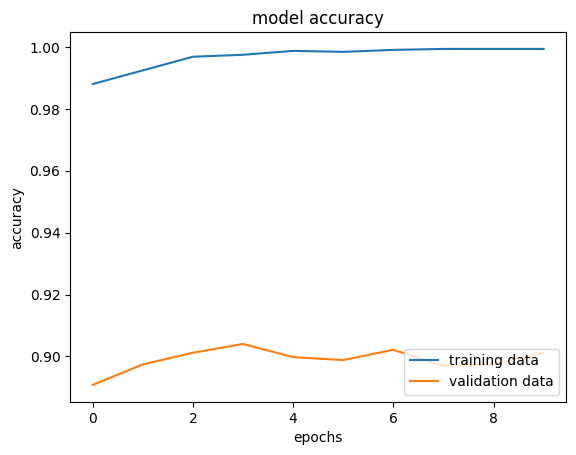

In [ ]:
#plotting loss and accuracy graphs
#1} Accuracy graph
#2] loss graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training data', 'validation data'], loc='lower right')

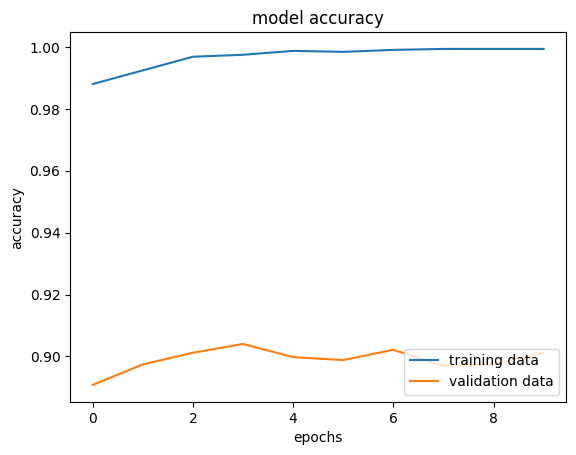

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training data', 'validation data'], loc='lower right')

In [ ]:
input_image_path=input('path of the image to be predicted: ')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
print(input_image.shape)
cv2.resize(input_image, (128,128))
input_image=input_image/255
reshpae_image=np.reshape(input_image, [1,128,128,3])
input_pred=model.predict(reshape_image)
pred_label=np.argmax(input_pred)
if pred_label==0:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')


